In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
ds= pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
ds.shape

(26707, 34)

In [4]:
ds.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
23818,23818,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Not Principle City",1.0,0.0,0
13234,13234,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Black,Female,"> $75,000",Not Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
23659,23659,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
25187,25187,1.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Hispanic,Female,Below Poverty,Married,Rent,Not in Labor Force,"MSA, Principle City",2.0,3.0,1
25059,25059,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,2.0,0
15024,15024,3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,1
24828,24828,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",1.0,1.0,0
7425,7425,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Married,Own,Employed,"MSA, Principle City",1.0,0.0,0
20928,20928,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
7249,7249,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0


In [5]:
ds.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

# Missing Values

In [7]:
ds.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

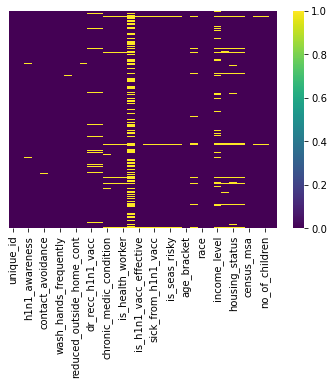

In [8]:
sns.heatmap(ds.isnull(), yticklabels=False, cmap='viridis')

In [9]:
ds.drop('unique_id', axis=1, inplace=True)
ds.dropna(inplace=True)
ds.shape

(11794, 33)

In [10]:
features = ds.iloc[:, :-1]   ##to get all features ie. independent variables
#features= ds.drop(['h1n1_vaccine'], axis=1)

In [11]:
features = features.fillna(features.median()) ###for float
features = round(features)

In [12]:
features = features.fillna('No Category')    ###for strings

In [13]:
ds.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11794 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11794 non-null  float64
 1   h1n1_awareness             11794 non-null  float64
 2   antiviral_medication       11794 non-null  float64
 3   contact_avoidance          11794 non-null  float64
 4   bought_face_mask           11794 non-null  float64
 5   wash_hands_frequently      11794 non-null  float64
 6   avoid_large_gatherings     11794 non-null  float64
 7   reduced_outside_home_cont  11794 non-null  float64
 8   avoid_touch_face           11794 non-null  float64
 9   dr_recc_h1n1_vacc          11794 non-null  float64
 10  dr_recc_seasonal_vacc      11794 non-null  float64
 11  chronic_medic_condition    11794 non-null  float64
 12  cont_child_undr_6_mnths    11794 non-null  float64
 13  is_health_worker           11794 non-null  flo

# Removing duplicate

In [15]:
ds.duplicated().sum()

2

In [16]:
ds.drop_duplicates(inplace=True)

In [17]:
ds.duplicated().sum()

0

In [18]:
ds.head()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,2.0,0.0,1
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Rent,Employed,"MSA, Not Principle City",2.0,0.0,1


# Unique values of Features

In [19]:
# for datatype= object

print("age_bracket")
print(ds.age_bracket.unique())

print("qualification")
print(ds.qualification.unique())

print("race")
print(ds.race.unique())

print("sex")
print(ds.sex.unique())

print("income_level")
print(ds.income_level.unique())

print("marital_status")
print(ds.marital_status.unique())

print("housing_status")
print(ds.housing_status.unique())

print("employment")
print(ds.employment.unique())

print("census_msa")
print(ds.census_msa.unique())

age_bracket
['55 - 64 Years' '35 - 44 Years' '45 - 54 Years' '65+ Years'
 '18 - 34 Years']
qualification
['< 12 Years' '12 Years' 'Some College' 'College Graduate']
race
['White' 'Black' 'Hispanic' 'Other or Multiple']
sex
['Female' 'Male']
income_level
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000']
marital_status
['Not Married' 'Married']
housing_status
['Own' 'Rent']
employment
['Not in Labor Force' 'Employed' 'Unemployed']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


# Encoding the object datatype in features

In [20]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

In [21]:
ds.age_bracket = enc.fit_transform(ds.age_bracket)
ds.qualification = enc.fit_transform(ds.qualification)
ds.race = enc.fit_transform(ds.race)
ds.sex = enc.fit_transform(ds.sex)
ds.income_level = enc.fit_transform(ds.income_level)
ds.marital_status = enc.fit_transform(ds.marital_status)
ds.housing_status = enc.fit_transform(ds.housing_status)
ds.employment = enc.fit_transform(ds.employment)
ds.census_msa = enc.fit_transform(ds.census_msa)

In [22]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11792 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11792 non-null  float64
 1   h1n1_awareness             11792 non-null  float64
 2   antiviral_medication       11792 non-null  float64
 3   contact_avoidance          11792 non-null  float64
 4   bought_face_mask           11792 non-null  float64
 5   wash_hands_frequently      11792 non-null  float64
 6   avoid_large_gatherings     11792 non-null  float64
 7   reduced_outside_home_cont  11792 non-null  float64
 8   avoid_touch_face           11792 non-null  float64
 9   dr_recc_h1n1_vacc          11792 non-null  float64
 10  dr_recc_seasonal_vacc      11792 non-null  float64
 11  chronic_medic_condition    11792 non-null  float64
 12  cont_child_undr_6_mnths    11792 non-null  float64
 13  is_health_worker           11792 non-null  flo

In [ ]:
ds.head()

In [ ]:
ds.describe()

In [ ]:
#sns.pairplot(ds, diag_kind='kde')

# Outliers

<AxesSubplot:xlabel='no_of_adults'>

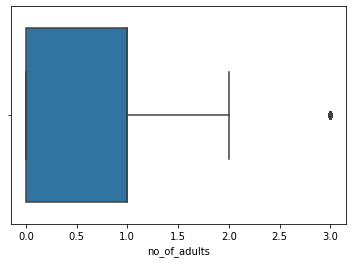

In [23]:
sns.boxplot(ds.no_of_adults)


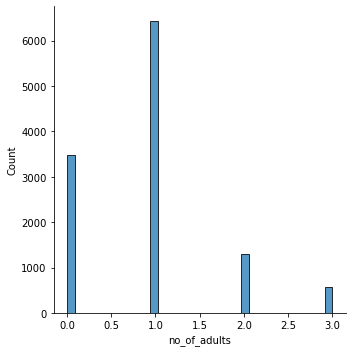

In [24]:
sns.displot(ds.no_of_adults)

<AxesSubplot:xlabel='no_of_children'>

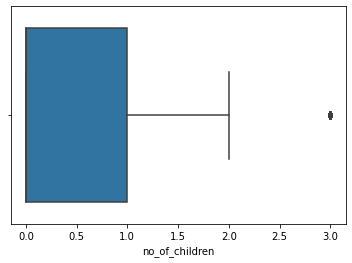

In [25]:
sns.boxplot(ds.no_of_children)

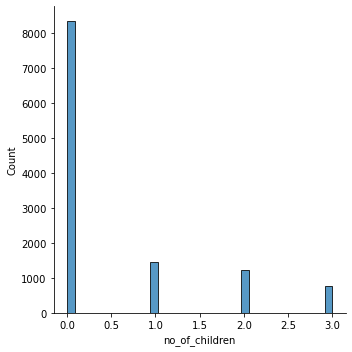

In [26]:
sns.displot(ds.no_of_children)

In [27]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11792 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 11792 non-null  float64
 1   h1n1_awareness             11792 non-null  float64
 2   antiviral_medication       11792 non-null  float64
 3   contact_avoidance          11792 non-null  float64
 4   bought_face_mask           11792 non-null  float64
 5   wash_hands_frequently      11792 non-null  float64
 6   avoid_large_gatherings     11792 non-null  float64
 7   reduced_outside_home_cont  11792 non-null  float64
 8   avoid_touch_face           11792 non-null  float64
 9   dr_recc_h1n1_vacc          11792 non-null  float64
 10  dr_recc_seasonal_vacc      11792 non-null  float64
 11  chronic_medic_condition    11792 non-null  float64
 12  cont_child_undr_6_mnths    11792 non-null  float64
 13  is_health_worker           11792 non-null  flo

# Split data

In [29]:
X= ds.drop(['h1n1_vaccine'], axis=1)
y= ds[['h1n1_vaccine']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Fit Model

In [31]:
model= LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()